> **note:** In this module, the organization will be different from that of supervised learning.

# Clustering
- **K-means:** Is a common example of an exclusive clustering method where data points are assigned into K groups, where K represents the number of clusters based on the distance from each group’s centroid. The data points closest to a given centroid will be clustered under the same category. A larger K value will be indicative of smaller groupings with more granularity whereas a smaller K value will have larger groupings and less granularity. K-means clustering is commonly used in market segmentation, document clustering, image segmentation, and image compression.

## Let's start

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


### Visualize the data

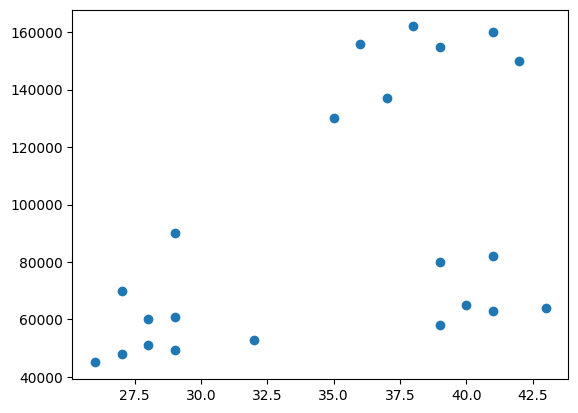

In [3]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

### Prepare Model

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

### Analizing

In [6]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


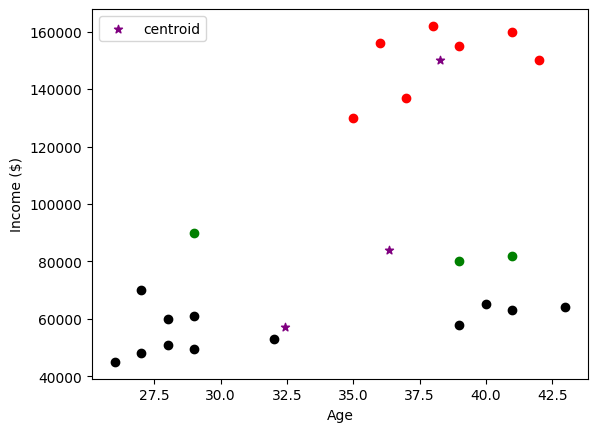

In [7]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

We can see that the has some problems this is because the scaling wich is to different between Income and Age that why we need to do some pre processing and scaling

In [8]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


We use MinMaxScaler so that all values have the same range from 0 to 1

### Now let's do it again

In [9]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [10]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

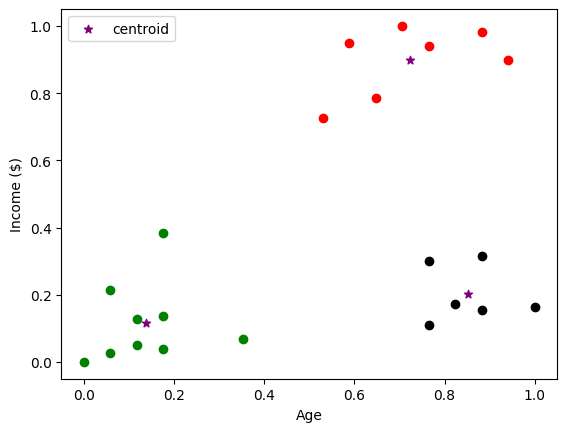

In [11]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

## Elbow Method

The elbow method is used to determinate the correct number of clusters(k
with a new variable called SSE(Sum of Squared Error) and the best way to find the number of clusters is finding the number that is in the elbow in the chart

In [12]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [13]:
sse

[5.434011511988179,
 2.091136388699078,
 0.47507834985530956,
 0.42313006706509215,
 0.2963623258321304,
 0.2811370377419925,
 0.19291351774882526,
 0.17687453294948938,
 0.11623513811466671,
 0.08139933135681814]

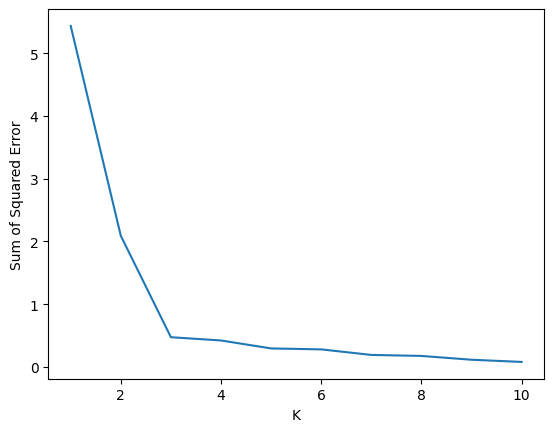

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

plt.plot(k_rng,sse)
plt.show()

As we can see the albow number is 3 so that's the best number of cluster(k) for our model

## Let's do another example:

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [16]:
iris = load_iris()

In [17]:
df = pd.DataFrame(columns=iris.feature_names, data=iris.data)

In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


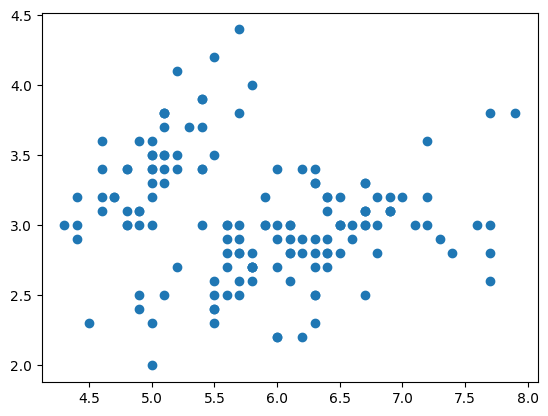

In [19]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])

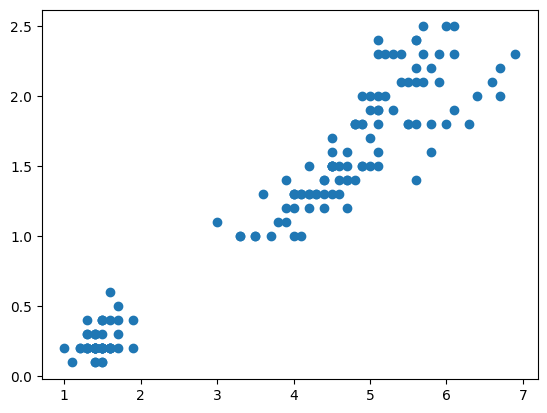

In [20]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [21]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['sepal width (cm)','petal width (cm)','petal length (cm)', 'sepal length (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [22]:
df['cluster'] = y_predicted

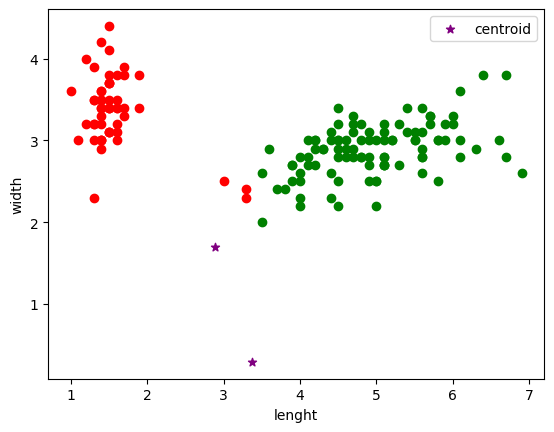

In [23]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]

plt.scatter(df1['petal length (cm)'], df1['sepal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['sepal width (cm)'], color='red')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple', marker='*', label='centroid')

plt.xlabel('lenght')
plt.ylabel('width')
plt.legend()
plt.show()

### Now  we will see what's the best number of clusters for the model

In [24]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal width (cm)','petal width (cm)','petal length (cm)', 'sepal length (cm)']])
    sse.append(km.inertia_)

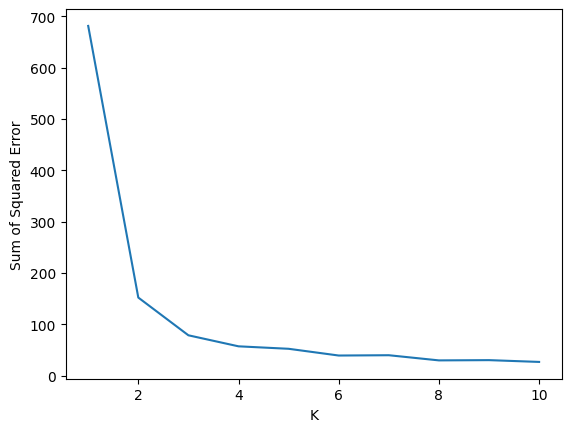

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

plt.plot(k_rng, sse)


We can discuss about if is 2 or it's 3


### Let's prove with 3 clusters

In [26]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal width (cm)','petal width (cm)','petal length (cm)', 'sepal length (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [27]:
df['cluster'] = y_predicted

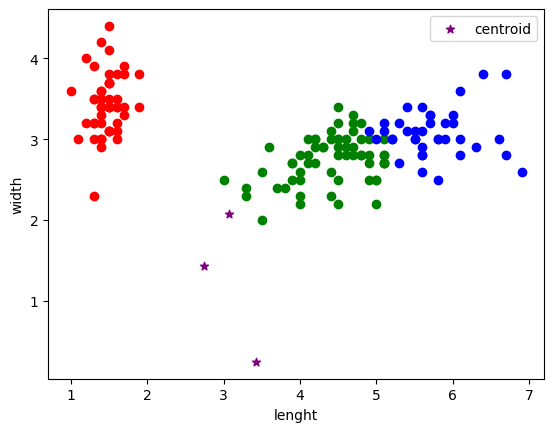

In [28]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['petal length (cm)'], df1['sepal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['sepal width (cm)'], color='red')
plt.scatter(df3['petal length (cm)'], df3['sepal width (cm)'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple', marker='*', label='centroid')

plt.xlabel('lenght')
plt.ylabel('width')
plt.legend()
plt.show()

In [29]:
df['target'] = iris.target

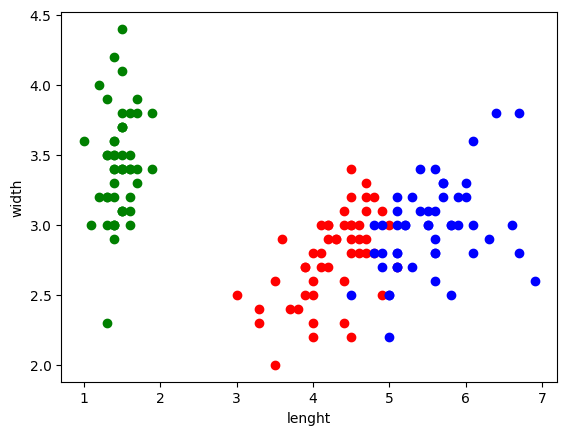

In [30]:
df1 = df[df.target == 0]
df2 = df[df.target == 1]
df3 = df[df.target == 2]

plt.scatter(df1['petal length (cm)'], df1['sepal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['sepal width (cm)'], color='red')
plt.scatter(df3['petal length (cm)'], df3['sepal width (cm)'], color='blue')

plt.xlabel('lenght')
plt.ylabel('width')
plt.show()